In [1]:
from modulos.analisis_pedigri import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
from IPython.display import Image
pd.options.display.max_columns = None

# Uso de funciones para análisis de pedigrí

## Cálculo de la verosimilitud de un pedigrí

Se calcula la verosimilitud para el siguiente pedigrí, en el que se cuenta con los genotipos de tres personas. 

Para ello se hace uso de la función **verosimilitud_pedigri** que requiere las frecuencias de los alelos, las relaciones de parentesco y los genotipos conocidos.

Primero se muestran el uso de algunas funciones que corresponden a pasos intermedios, aunque estos no son necesarios para usar la función **verosimilitud_pedigri**, ya que los hace internamente.

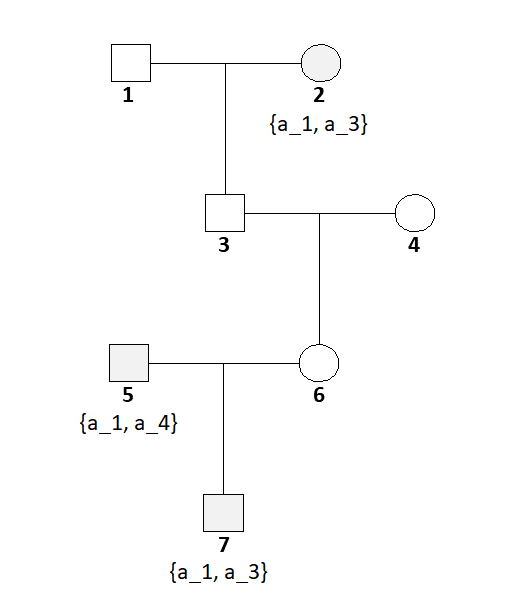

In [4]:
Image(filename='figuras/rb_pedigri_ve_ejemplo.png')

#### Definición de parámetros de la población

In [5]:
frecuencias_alelos = np.array([0.1 , 0.14, 0.24, 0.04, 0.48])

In [6]:
frecuencias_alelos.sum()

1.0

In [7]:
alelos = ['a_1', 'a_2', 'a_3', 'a_4', 'a_5']

#### Información de los miembros del pedigrí

In [8]:
fundadores = ['P1', 'P2', 'P4', 'P5']
descendientes = ['P3', 'P6', 'P7']
# persona:(padre, madre)
dict_relaciones_persona_padres = {'P3':('P1','P2'), 'P6':('P3','P4'), 'P6':('P3','P4'), 'P7':('P5','P6')}
personas_observadas = ['P2', 'P5', 'P7']
personas_no_observadas = ['P1', 'P3', 'P4', 'P6']

#### Genotipos observados

In [9]:
df_genotipos_observados = pd.DataFrame(data = [['a_1','a_3'],
                                       ['a_1','a_4'],
                                       ['a_1','a_3']],
                                columns = ['alelo_1','alelo_2'], index = ['P2', 'P5', 'P7'])

df_genotipos_observados

,alelo_1,alelo_2
P2,a_1,a_3
P5,a_1,a_4
P7,a_1,a_3


#### Lista de genotipos ordenados
Para calcular la verosimilitud se tienen que considerar los posibles órdenes de los genotipos 

Cada columna es un posible orden

In [10]:
enlistar_genotipos_ordenados(df_genotipos_observados, df_genotipos_observados.index)

,0,1,2,3,4,5,6,7
P7_0,a_3,a_1,a_3,a_1,a_3,a_1,a_3,a_1
P7_1,a_1,a_3,a_1,a_3,a_1,a_3,a_1,a_3
P5_0,a_4,a_4,a_1,a_1,a_4,a_4,a_1,a_1
P5_1,a_1,a_1,a_4,a_4,a_1,a_1,a_4,a_4
P2_0,a_3,a_3,a_3,a_3,a_1,a_1,a_1,a_1
P2_1,a_1,a_1,a_1,a_1,a_3,a_3,a_3,a_3


#### Tabla de la distribución de probabilidad condicional para los descendientes (Sin mutaciones)

Esta es la DPC que se asocia a cada nodo de la red de alelos

In [11]:
tabla_herencia(alelos, modelo_herencia_mendeliano)

,"(a_1, a_1)","(a_1, a_2)","(a_1, a_3)","(a_1, a_4)","(a_1, a_5)","(a_2, a_1)","(a_2, a_2)","(a_2, a_3)","(a_2, a_4)","(a_2, a_5)","(a_3, a_1)","(a_3, a_2)","(a_3, a_3)","(a_3, a_4)","(a_3, a_5)","(a_4, a_1)","(a_4, a_2)","(a_4, a_3)","(a_4, a_4)","(a_4, a_5)","(a_5, a_1)","(a_5, a_2)","(a_5, a_3)","(a_5, a_4)","(a_5, a_5)"
a_1,1.0,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
a_2,0.0,0.5,0.0,0.0,0.0,0.5,1.0,0.5,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
a_3,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0
a_4,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.5,0.0
a_5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.5,1.0


#### Aristas de la red de alelos

In [12]:
crear_aristas_red_alelos(dict_relaciones_persona_padres)

[('P1_1', 'P3_1'),
 ('P1_0', 'P3_1'),
 ('P2_1', 'P3_0'),
 ('P2_0', 'P3_0'),
 ('P3_1', 'P6_1'),
 ('P3_0', 'P6_1'),
 ('P4_1', 'P6_0'),
 ('P4_0', 'P6_0'),
 ('P5_1', 'P7_1'),
 ('P5_0', 'P7_1'),
 ('P6_1', 'P7_0'),
 ('P6_0', 'P7_0')]

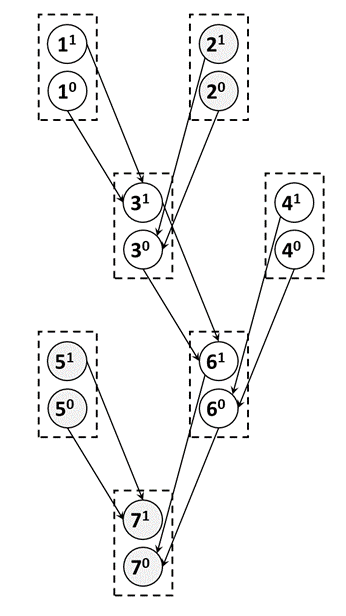

In [13]:
Image(filename='figuras/rb_alelos_ve_ejemplo.png')

#### Cálculo de la verosimilitud

La función requiere varios parámetros, entre los que se puede elegir el modelo de herencia y el orden de eliminación.

In [14]:
verosimilud = verosimilitud_pedigri(fundadores, descendientes,
                                    dict_relaciones_persona_padres,
                                    personas_observadas, personas_no_observadas,
                                    alelos, frecuencias_alelos,
                                    df_genotipos_observados,
                                    modelo_herencia = modelo_herencia_mendeliano, 
                                    metodo_eliminacion = MinNeighbors,
                                    return_genotipos_ordenados = False,
                                    mostrar_model_check = True, mostrar_orden_eliminacion = True)

Modelo válido : True
Orden de eliminación:  ['P4_1', 'P4_0', 'P6_0', 'P1_0', 'P1_1', 'P3_1', 'P6_1', 'P3_0']


In [15]:
verosimilud

5.856000000000001e-05

#### Cálculo de la verosimilitud con los genotipos ordenados

En caso que se desee conocer el valor de la probabilidad marginal evaluada en cada genotipo ordenado, usar **return_genotipos_ordenados = True**

In [16]:
genotipos_ordenados_verosimilud = verosimilitud_pedigri(fundadores, descendientes,
                                                        dict_relaciones_persona_padres,
                                                        personas_observadas, personas_no_observadas,
                                                        alelos, frecuencias_alelos,
                                                        df_genotipos_observados,
                                                        modelo_herencia = modelo_herencia_mendeliano, 
                                                        metodo_eliminacion = MinNeighbors,
                                                        return_genotipos_ordenados = True,
                                                        mostrar_model_check = True, mostrar_orden_eliminacion = True)

Modelo válido : True
Orden de eliminación:  ['P4_1', 'P4_0', 'P6_0', 'P1_0', 'P1_1', 'P3_1', 'P6_1', 'P3_0']


In [17]:
genotipos_ordenados_verosimilud

,0,1,2,3,4,5,6,7
P7_0,a_3,a_1,a_3,a_1,a_3,a_1,a_3,a_1
P7_1,a_1,a_3,a_1,a_3,a_1,a_3,a_1,a_3
P5_0,a_4,a_4,a_1,a_1,a_4,a_4,a_1,a_1
P5_1,a_1,a_1,a_4,a_4,a_1,a_1,a_4,a_4
P2_0,a_3,a_3,a_3,a_3,a_1,a_1,a_1,a_1
P2_1,a_1,a_1,a_1,a_1,a_3,a_3,a_3,a_3
Probabilidad,1.464e-05,0,1.464e-05,0,1.464e-05,0,1.464e-05,0


Para calcular la verosimilitud sólo hay que sumar sobre la última fila

In [18]:
genotipos_ordenados_verosimilud.loc['Probabilidad'].sum()

5.856000000000001e-05

## Verosimilitud con mutaciones

Primero se compara el modelo de herencia mendeliano contra uno de mutación constante.

### Modelo de herencia mendeliano

#### Ejemplo: Progenitor homocigoto

In [19]:
alelo = 'a_1'
alelos_progenitor = ('a_1', 'a_1')
modelo_herencia_mendeliano(alelo, alelos_progenitor)

1

#### Ejemplo: Progenitor heterocigoto

In [20]:
alelo = 'a_1'
alelos_progenitor = ('a_1', 'a_2')
modelo_herencia_mendeliano(alelo, alelos_progenitor)

0.5

#### Incompatibildiad de alelos

In [21]:
alelo = 'a_1'
alelos_progenitor = ('a_2', 'a_2')
modelo_herencia_mendeliano(alelo, alelos_progenitor)

0

### Modelo de herencia con mutaciones

Se define el modelo de mutación. 

Note que en el caso que los genotipos son incompatibles, el modelo con mutaciones da un valor distinto de cero.

#### Modelo constante con tasa de mutación 0.007

In [22]:
mu = 0.007
n_alelos = 5
modelo_mutacion_constante = crear_modelo_mutacion_constante(mu, n_alelos)
modelo_herencia_mutacion_constante = crear_modelo_herencia(modelo_mutacion_constante)

#### Ejemplo: Progenitor homocigoto

In [23]:
alelo = 'a_1'
alelos_progenitor = ('a_1', 'a_1')
modelo_herencia_mutacion_constante(alelo, alelos_progenitor)

0.993

#### Ejemplo: Progenitor heterocigoto

In [24]:
alelo = 'a_1'
alelos_progenitor = ('a_1', 'a_2')
modelo_herencia_mutacion_constante(alelo, alelos_progenitor)

0.497375

#### Incompatibildiad de alelos

In [25]:
alelo = 'a_1'
alelos_progenitor = ('a_2', 'a_2')
modelo_herencia_mutacion_constante(alelo, alelos_progenitor)

0.00175

### Tabla de la distribución de probabilidad condicional

#### Sin mutaciones

In [26]:
#es la dpc
tabla_herencia(alelos, modelo_herencia_mendeliano)

,"(a_1, a_1)","(a_1, a_2)","(a_1, a_3)","(a_1, a_4)","(a_1, a_5)","(a_2, a_1)","(a_2, a_2)","(a_2, a_3)","(a_2, a_4)","(a_2, a_5)","(a_3, a_1)","(a_3, a_2)","(a_3, a_3)","(a_3, a_4)","(a_3, a_5)","(a_4, a_1)","(a_4, a_2)","(a_4, a_3)","(a_4, a_4)","(a_4, a_5)","(a_5, a_1)","(a_5, a_2)","(a_5, a_3)","(a_5, a_4)","(a_5, a_5)"
a_1,1.0,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
a_2,0.0,0.5,0.0,0.0,0.0,0.5,1.0,0.5,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
a_3,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0
a_4,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.5,0.0
a_5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.5,1.0


#### Con mutaciones

In [27]:
#es la dpc
tabla_herencia(alelos, modelo_herencia_mutacion_constante)

,"(a_1, a_1)","(a_1, a_2)","(a_1, a_3)","(a_1, a_4)","(a_1, a_5)","(a_2, a_1)","(a_2, a_2)","(a_2, a_3)","(a_2, a_4)","(a_2, a_5)","(a_3, a_1)","(a_3, a_2)","(a_3, a_3)","(a_3, a_4)","(a_3, a_5)","(a_4, a_1)","(a_4, a_2)","(a_4, a_3)","(a_4, a_4)","(a_4, a_5)","(a_5, a_1)","(a_5, a_2)","(a_5, a_3)","(a_5, a_4)","(a_5, a_5)"
a_1,0.99300,0.497375,0.497375,0.497375,0.497375,0.497375,0.00175,0.001750,0.001750,0.001750,0.497375,0.001750,0.00175,0.001750,0.001750,0.497375,0.001750,0.001750,0.00175,0.001750,0.497375,0.001750,0.001750,0.001750,0.00175
a_2,0.00175,0.497375,0.001750,0.001750,0.001750,0.497375,0.99300,0.497375,0.497375,0.497375,0.001750,0.497375,0.00175,0.001750,0.001750,0.001750,0.497375,0.001750,0.00175,0.001750,0.001750,0.497375,0.001750,0.001750,0.00175
a_3,0.00175,0.001750,0.497375,0.001750,0.001750,0.001750,0.00175,0.497375,0.001750,0.001750,0.497375,0.497375,0.99300,0.497375,0.497375,0.001750,0.001750,0.497375,0.00175,0.001750,0.001750,0.001750,0.497375,0.001750,0.00175
a_4,0.00175,0.001750,0.001750,0.497375,0.001750,0.001750,0.00175,0.001750,0.497375,0.001750,0.001750,0.001750,0.00175,0.497375,0.001750,0.497375,0.497375,0.497375,0.99300,0.497375,0.001750,0.001750,0.001750,0.497375,0.00175
a_5,0.00175,0.001750,0.001750,0.001750,0.497375,0.001750,0.00175,0.001750,0.001750,0.497375,0.001750,0.001750,0.00175,0.001750,0.497375,0.001750,0.001750,0.001750,0.00175,0.497375,0.497375,0.497375,0.497375,0.497375,0.99300


#### Cálculo de la verosimilitud

Sólo hay que cambiar el valor de **modelo_herencia**, en este caso es **modelo_herencia = modelo_herencia_mutacion_constante**

In [28]:
verosimilud_m = verosimilitud_pedigri(fundadores, descendientes,
                                    dict_relaciones_persona_padres,
                                    personas_observadas, personas_no_observadas,
                                    alelos, frecuencias_alelos,
                                    df_genotipos_observados,
                                    modelo_herencia = modelo_herencia_mutacion_constante, 
                                    metodo_eliminacion = MinNeighbors,
                                    return_genotipos_ordenados = False,
                                    mostrar_model_check = True, mostrar_orden_eliminacion = True)

Modelo válido : True
Orden de eliminación:  ['P4_1', 'P4_0', 'P6_0', 'P1_0', 'P1_1', 'P3_1', 'P6_1', 'P3_0']


In [29]:
verosimilud_m

5.7897683423639544e-05

#### Cálculo de la verosimilitud con los genotipos ordenados

Como se esperaría, todos los genotipos ordenados (incluyendo a los que dan incompatibilidades) tienen probabilidad distinta de cero.

In [30]:
genotipos_ordenados_verosimilud_m = verosimilitud_pedigri(fundadores, descendientes,
                                                        dict_relaciones_persona_padres,
                                                        personas_observadas, personas_no_observadas,
                                                        alelos, frecuencias_alelos,
                                                        df_genotipos_observados,
                                                        modelo_herencia = modelo_herencia_mutacion_constante, 
                                                        metodo_eliminacion = MinNeighbors,
                                                        return_genotipos_ordenados = True,
                                                        mostrar_model_check = True, mostrar_orden_eliminacion = True)

Modelo válido : True
Orden de eliminación:  ['P4_1', 'P4_0', 'P6_0', 'P1_0', 'P1_1', 'P3_1', 'P6_1', 'P3_0']


In [31]:
genotipos_ordenados_verosimilud_m

,0,1,2,3,4,5,6,7
P7_0,a_3,a_1,a_3,a_1,a_3,a_1,a_3,a_1
P7_1,a_1,a_3,a_1,a_3,a_1,a_3,a_1,a_3
P5_0,a_4,a_4,a_1,a_1,a_4,a_4,a_1,a_1
P5_1,a_1,a_1,a_4,a_4,a_1,a_1,a_4,a_4
P2_0,a_3,a_3,a_3,a_3,a_1,a_1,a_1,a_1
P2_1,a_1,a_1,a_1,a_1,a_3,a_3,a_3,a_3
Probabilidad,1.44409e-05,3.35278e-08,1.44409e-05,3.35278e-08,1.44409e-05,3.35278e-08,1.44409e-05,3.35278e-08


Para calcular la verosimilitud sólo hay que sumar sobre la última fila

In [32]:
genotipos_ordenados_verosimilud_m.loc['Probabilidad'].sum()

5.7897683423639544e-05

## Resumen: Cálculo directo

La verosimilitud se puede calcular directamente con la función **verosimilitud_pedigri**

In [33]:
frecuencias_alelos = np.array([0.1 , 0.14, 0.24, 0.04, 0.48])
alelos = ['a_1', 'a_2', 'a_3', 'a_4', 'a_5']
fundadores = ['P1', 'P2', 'P4', 'P5']

descendientes = ['P3', 'P6', 'P7']
# persona:(padre, madre)
dict_relaciones_persona_padres = {'P3':('P1','P2'), 'P6':('P3','P4'), 'P6':('P3','P4'), 'P7':('P5','P6')}
personas_observadas = ['P2', 'P5', 'P7']
personas_no_observadas = ['P1', 'P3', 'P4', 'P6']

df_genotipos_observados = pd.DataFrame(data = [['a_1','a_3'],
                                       ['a_1','a_4'],
                                       ['a_1','a_3']],
                                columns = ['alelo_1','alelo_2'], index = ['P2', 'P5', 'P7'])

verosimilud = verosimilitud_pedigri(fundadores, descendientes,
                                    dict_relaciones_persona_padres,
                                    personas_observadas, personas_no_observadas,
                                    alelos, frecuencias_alelos,
                                    df_genotipos_observados,
                                    modelo_herencia = modelo_herencia_mendeliano, 
                                    metodo_eliminacion = MinNeighbors)

In [34]:
verosimilud

5.856000000000001e-05

Con **help** se puede consultar la documentación de cada una de las funciones

In [35]:
help(verosimilitud_pedigri)

Help on function verosimilitud_pedigri in module modulos.analisis_pedigri:

verosimilitud_pedigri(fundadores, descendientes, dict_relaciones_persona_padres, personas_observadas, personas_no_observadas, alelos, frecuencias_alelos, df_genotipos_observados, modelo_herencia=<function modelo_herencia_mendeliano at 0x0000023AF53F90D0>, metodo_eliminacion=<class 'pgmpy.inference.EliminationOrder.MinNeighbors'>, return_genotipos_ordenados=False, mostrar_model_check=False, mostrar_orden_eliminacion=False, mostrar_avance_ve=False, mostrar_avance_inferencia=False)
    Calcula la verosimilitud de un pedigrí a partir de los genotipos obsevados.
    La verosimilitud del pedigrí es la suma de las evaluaciones de la distribución marginal sobre todos los genotipos ordenados.
    Se requiere la información sobre las relaciones de parentesco, los genotipos observados, así como de los parámetros de la población y del modelo de herencia.
    
    Parameters
    -------------
    fundadores: list
        No